In [60]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

path_to_results = mt.ROOT_DIR / 'results' / 'height'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()

In [61]:
fulldf

,Unnamed: 0,episode_idx,metric,value,tag,model,n_shot,n_class,logger,checkpoint_callback,...,num_workers,n_query,model_name,learning_rate,d_root,height,taxonomy_name,loss_weight_fn,loss_alpha,loss_beta
0,0,0,f1_micro,0.756944,protonet,height-v1-height=4,16,12,True,True,...,20,12,hprotonet,0.03,128,4,deeper-mdb,exp,1.0,0.5
1,1,0,f1_macro,0.745958,protonet,height-v1-height=4,16,12,True,True,...,20,12,hprotonet,0.03,128,4,deeper-mdb,exp,1.0,0.5
2,2,0,epi-accuracy,0.756944,protonet,height-v1-height=4,16,12,True,True,...,20,12,hprotonet,0.03,128,4,deeper-mdb,exp,1.0,0.5
3,3,0,hlca-mistake,4.114286,protonet,height-v1-height=4,16,12,True,True,...,20,12,hprotonet,0.03,128,4,deeper-mdb,exp,1.0,0.5
4,4,0,hierarchical-precision,0.800000,protonet,height-v1-height=4,16,12,True,True,...,20,12,hprotonet,0.03,128,4,deeper-mdb,exp,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,1895,99,f1_macro,0.645867,prototree-h3,H_i=0 (baseline),1,12,True,True,...,20,12,hprotonet,0.03,128,0,deeper-mdb,exp,1.0,0.5
37996,1896,99,epi-accuracy,0.630556,prototree-h3,H_i=0 (baseline),1,12,True,True,...,20,12,hprotonet,0.03,128,0,deeper-mdb,exp,1.0,0.5
37997,1897,99,f1_micro,0.657639,prototree-h4,H_i=0 (baseline),1,12,True,True,...,20,12,hprotonet,0.03,128,0,deeper-mdb,exp,1.0,0.5
37998,1898,99,f1_macro,0.650989,prototree-h4,H_i=0 (baseline),1,12,True,True,...,20,12,hprotonet,0.03,128,0,deeper-mdb,exp,1.0,0.5


In [62]:
df = fulldf[fulldf.n_shot == 8]
df = df[df.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df.sort_values(by='name')

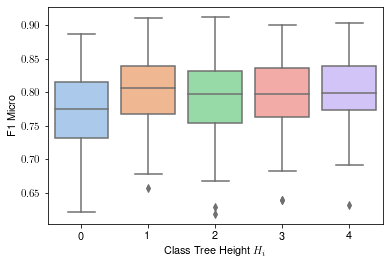

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='height', y='value',  palette="pastel")
# plt.title('F1 Micro')
plt.ylabel('F1 Micro')
plt.xlabel('Class Tree Height $H_i$')
# plt.tight_layout()
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'height-vs-f1.png')
fig


In [64]:
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')

2021-05-04:19:33:03,58 WARNING  [font_manager.py:1357] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


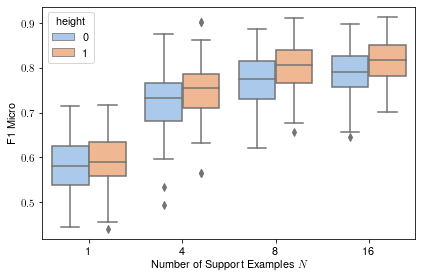

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='n_shot', y='value', hue='height', palette="pastel")
# plt.title('F1 Micro')
plt.ylabel('F1 Micro')
plt.xlabel('Number of Support Examples $N$')
plt.tight_layout()
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'n_shot-vs-f1.png')
fig

In [66]:
df = fulldf[fulldf.metric == 'hlca-mistake']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')
df.value = df.value / 5

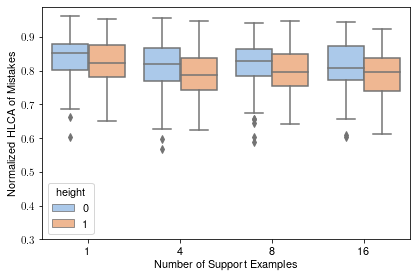

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='n_shot', y='value', hue='height', palette="pastel")
# plt.title('')
plt.ylabel('Normalized HLCA of Mistakes')
plt.xlabel('Number of Support Examples')
plt.tight_layout()
plt.ylim([0.3, 0.99])
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'normalized-hlca.png')
fig